In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In this project, we'll work with exit surveys from employees of [the Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The original TAFE exit survey data is no longer available. 

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:


*   Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
*   Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)



In [43]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

###  Identify Missing Values and Drop Unnecessary Columns

In [44]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [45]:
dete_survey['Job dissatisfaction'].value_counts()

False    733
True      89
Name: Job dissatisfaction, dtype: int64

In [46]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [47]:
#Cehcking DETE dataset for missing values
dete_survey.isnull().sum()


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

DETE dataset has an excessive number of missing values in the next columns:

* `Aboriginal`                          806
* `Torres Strait`                          819
* `South Sea`                              815
* `Disability`                             799
* `NESB`                                   790
* `Classification`                         367
* `Business Unit`                          696


Finding the total number of missing values in dete_survey.

In [48]:
total_misisng_dete = (dete_survey.isnull().sum()).sum()
print(f'The total number of missing values in dete_survey is: {total_misisng_dete}')

The total number of missing values in dete_survey is: 5674


In [49]:
# sns.heatmap(dete_survey.isnull(), cbar=False)

TAFE dataset analysis:

In [50]:
tafe_survey.head()


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [51]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [52]:
total_misisng_tafe = (tafe_survey.isnull().sum()).sum()
print(f'The total number of missing values in tafe_survey is: {total_misisng_tafe}')

The total number of missing values in tafe_survey is: 9973


In [53]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [54]:
missing_tafe = tafe_survey.loc[:, tafe_survey.isnull().sum() >= 106]
missing_tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 35 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   Contributing Factors. Career Move - Public Sector                                                                437 non-null    object
 1   Contributing Factors. Career Move - Private Sector                                                               437 non-null    object
 2   Contributing Factors. Career Move - Self-employment                                                              437 non-null    object
 3   Contributing Factors. Ill Health                                                                                 437 non-null    object
 4   Contributing Factors. Maternity/Family      

TAFE dataset has 35 columns that missing at least 106 values. 

Visualize the columns with missing values in DETE and TAFE dataset.

In [55]:
def visualize_missing_values(df1, df2):
    '''This function takes df as argument ,
    create  filter _df that contains only columns with missing values, 
    and return a heatmap to visualize missing values.
    '''
    filtered_df1 = df1.columns[df1.isnull().any()]
    filtered_df2 = df2.columns[df2.isnull().any()]

    if len(filtered_df1) == 0 or len(filtered_df2) == 0:
        print("No missing values to visualize.")
        return
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

    sns.heatmap(df1[filtered_df1].isnull(), cbar=False, ax=axes[0])
    sns.heatmap(df2[filtered_df2].isnull(), cbar=False, ax=axes[1])
    plt.show()

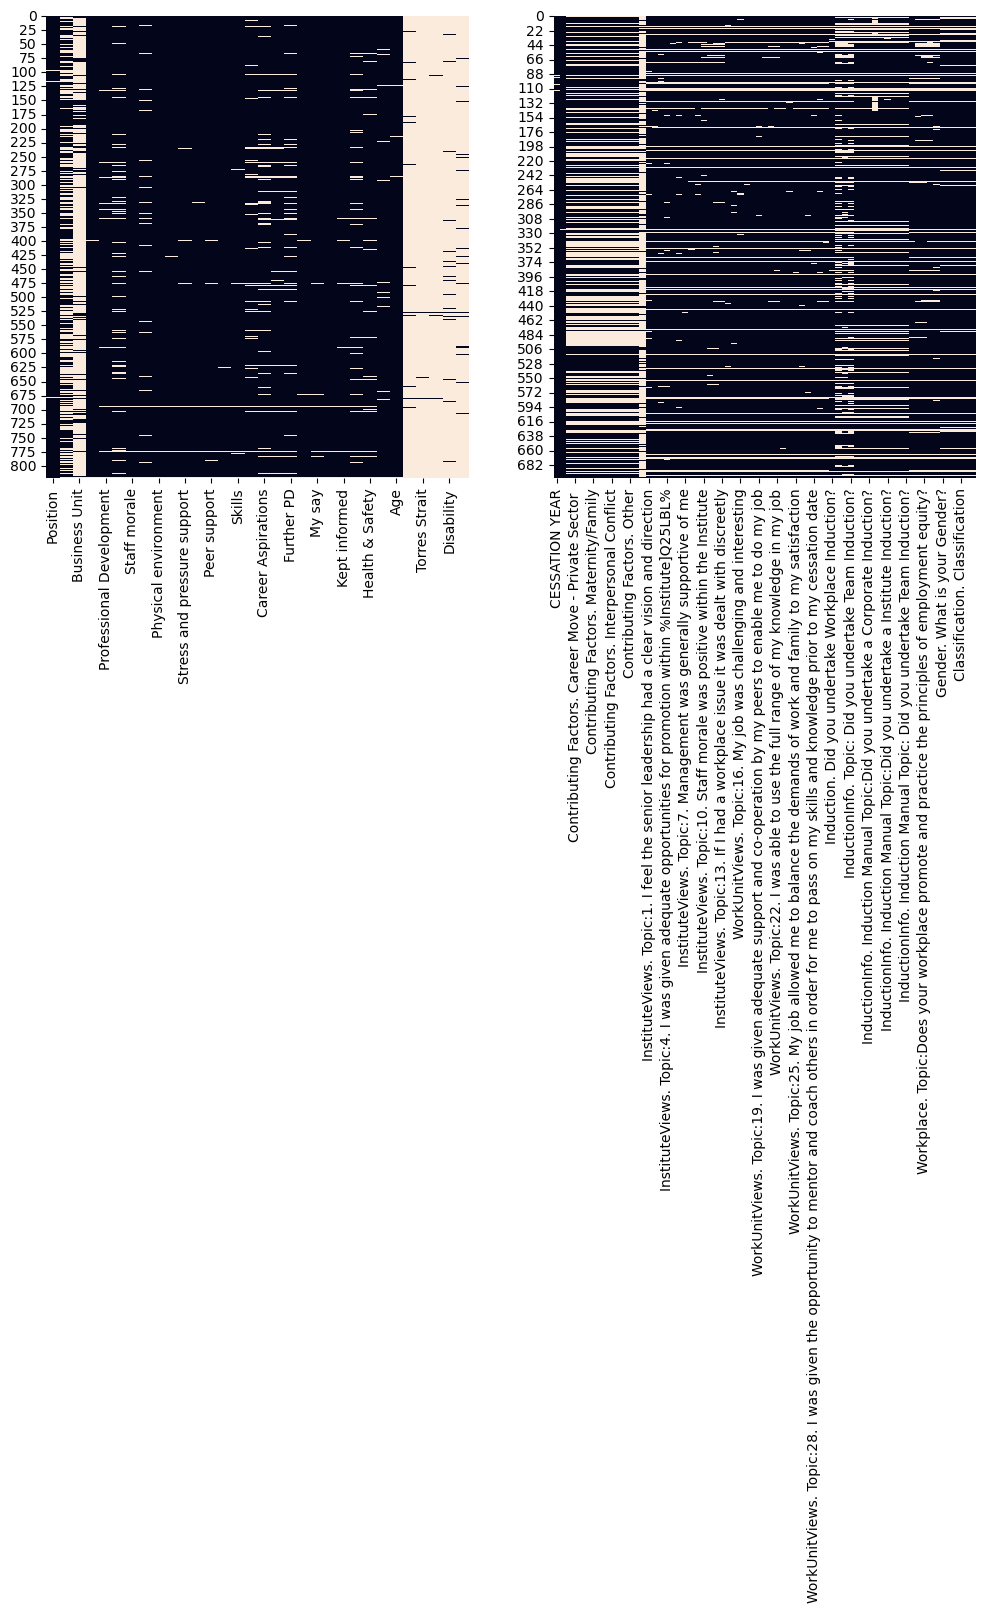

In [56]:
visualize_missing_values(dete_survey, tafe_survey)

We can make the following observations based on the work above:

* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### Identify Missing Values and Drop Unnecessary Columns

In [57]:
# Read 'Not Stated" values as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')


Let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.

In [58]:
cols_to_drop = dete_survey.columns[28:49]
cols_to_drop

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [59]:
dete_survey_updated = dete_survey.drop(cols_to_drop, axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [60]:
tafe_cols_to_drop = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(tafe_cols_to_drop, axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

 ### Clean Column Names

 Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:
 
![Table](table.png)


In [61]:
#Rename the remaining columns in the dete_survey_updated dataframe
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [62]:
# Update the columns in tafe_survey_updated
cols_names = {'Record ID': 'id',
            'CESSATION YEAR': 'cease_date',
            'Reason for ceasing employment': 'separationtype',
            'Gender. What is your Gender?': 'gender',
            'CurrentAge. Current Age': 'age',
            'Employment Type. Employment Type': 'employment_status',
            'Classification. Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated = tafe_survey_updated.rename(cols_names, axis=1)
tafe_survey_updated.columns


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

###  Filter the Data

Our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
* What about employees who have been at the job longer?

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [63]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

In [64]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [65]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [66]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [67]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [68]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

###  Verify the Data

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. 

Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [69]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [70]:
# # Convert the 'separationtype' column to datetime format
# dete_survey_updated['separationtype'] = pd.to_datetime(dete_survey_updated['separationtype'], errors='coerce')

# # Extract the year from the datetime objects
# dete_survey_updated['separation_year'] = dete_survey_updated['separationtype'].dt.year

# # Convert the year to float format
# dete_survey_updated['separation_year'] = dete_survey_updated['separation_year'].astype(float)


In [71]:
# Extaract the years and convert to float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [72]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

### Create box plots to display the distribution of years in the DETE and TAFE datasets.

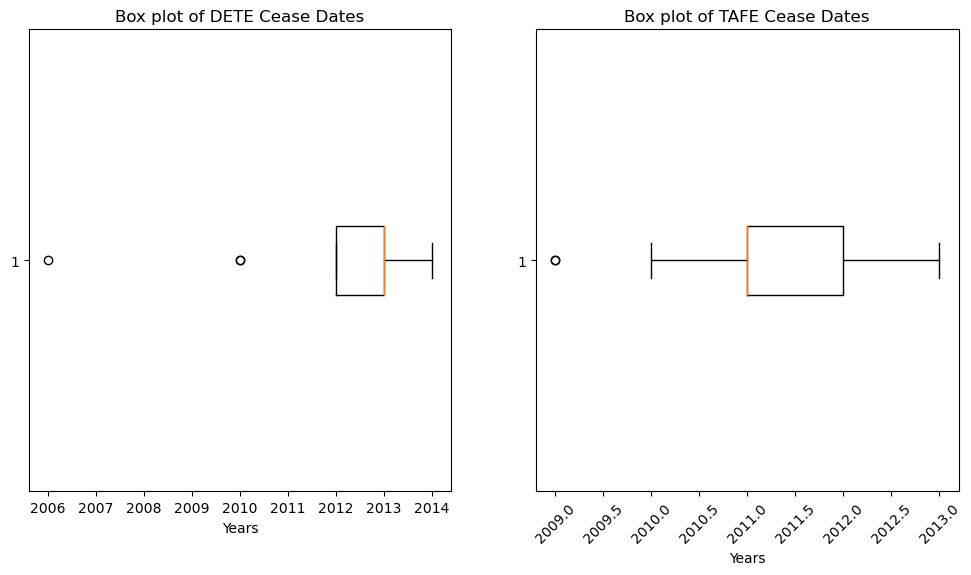

In [73]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.boxplot(dete_resignations['cease_date'].dropna(), vert=False)
plt.xlabel('Years')
plt.title('Box plot of DETE Cease Dates')

plt.subplot(1,2,2)
plt.boxplot(tafe_resignations['cease_date'].dropna(), vert=False)
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.title('Box plot of TAFE Cease Dates')
plt.show()

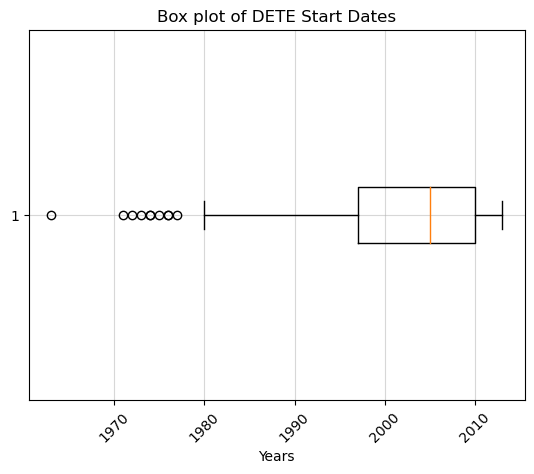

In [74]:

plt.boxplot(dete_resignations['dete_start_date'].dropna(), vert=False)
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.title('Box plot of DETE Start Dates')
plt.grid(visible=True, alpha=0.5)
plt.show()

In [75]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

The years in both dataframes don't completely align.
* The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. 
* The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.
* The resignations from TAFE primarily occurred during 2011-2012, while those from DETE were concentrated in 2012-2013.
*  The starting years for DETE are in range of 1998-2010

### Create a New Column

There aren't any major issues with the years.
The years in each dataframe don't span quite the same number of years.
You may have noticed that the `tafe_resignations` dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

In [76]:
# tafe_resignations.columns

In [77]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

### Identify Dissatisfied Employee

 We'll identify any employees who resigned because they were dissatisfied.
 Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

- tafe_survey_updated:
`Contributing Factors. Dissatisfaction`
`Contributing Factors. Job Dissatisfaction`

* dete_survey_updated:
`job_dissatisfaction`
`dissatisfaction_with_the_department`
`physical_work_environment`
`lack_of_recognition`
`lack_of_job_security`
`work_location`
`employment_conditions`
`work_life_balance`
`workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.



In [78]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [79]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

The new dissatisfied column will contain just the following values:

True: indicates a person resigned because they were dissatisfied with the job
False: indicates a person resigned because of a reason other than dissatisfaction with the job
NaN: indicates the value is missing

In [80]:
def update_vals(x):
    if pd.isnull(x):
        return np.nan
    elif x == '-':
        return False
    else:
        return True

In [81]:
# Apply function to TAFE data
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up[
    ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations_up[
    ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)



In [82]:
print(tafe_resignations_up['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations_up['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [83]:
#create new column for dissatisfied
tafe_resignations_up['dissatisfied'] = tafe_resignations_up[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

In [84]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)



False    162
True     149
Name: dissatisfied, dtype: int64

### Combine the Data

Our end goal is to aggregate the data according to the institute_service column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

In [85]:
# add a column to each dataframe that will allow us to easily distinguish between the two
dete_resignations_up['institute']  = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'


In [86]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)



In [87]:
# drop any columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 51.5+ KB


### Clean the Service Column
we'll have to clean up the institute_service column.To analyze the data, we'll convert these numbers into categories.
We'll use the version below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [88]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


In [89]:
# change the type to 'str', extract years and convert to float
combined_updated.loc[:,'institute_service_upd'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)').astype('float')


C:\Users\wolf0\AppData\Local\Temp\ipykernel_23100\3581567642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated.loc[:,'institute_service_upd'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)').astype('float')


In [90]:
combined_updated['institute_service_upd'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
26.0      2
36.0      2
30.0      2
34.0      1
27.0      1
29.0      1
42.0      1
33.0      1
41.0      1
35.0      1
49.0      1
38.0      1
31.0      1
Name: institute_service_upd, dtype: int64

In [100]:
def mapping_years(year):
    # year = pd.to_numeric(year, errors='coerce')  # Convert to numeric, coerce errors to NaN
    if year >= 11:
        return 'Veteran'
    elif (year >= 7) and (year <11):
        return 'Established'
    elif (year >=3) and (year < 7):
        return 'Experienced'
    elif pd.isnull(year):
        return np.nan
    else:
        return 'New'
    
combined_updated.loc[:,'service_cat'] = combined_updated['institute_service_upd'].apply(mapping_years)



C:\Users\wolf0\AppData\Local\Temp\ipykernel_23100\13229466.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated.loc[:,'service_cat'] = combined_updated['institute_service_upd'].apply(mapping_years)


In [92]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

###  Initial Analysis
we created a service_cat column, that categorizes employees according to the amount of years spent in their workplace:

New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company

In [93]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [103]:
combined_updated.loc[:,'dissatisfied'] = combined_updated.loc[:, 'dissatisfied'].fillna(False)

C:\Users\wolf0\AppData\Local\Temp\ipykernel_23100\3888089194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated.loc[:,'dissatisfied'] = combined_updated.loc[:, 'dissatisfied'].fillna(False)


In [95]:
combined_updated.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute',
       'institute_service_upd', 'service_cat'],
      dtype='object')

<Axes: xlabel='service_cat'>

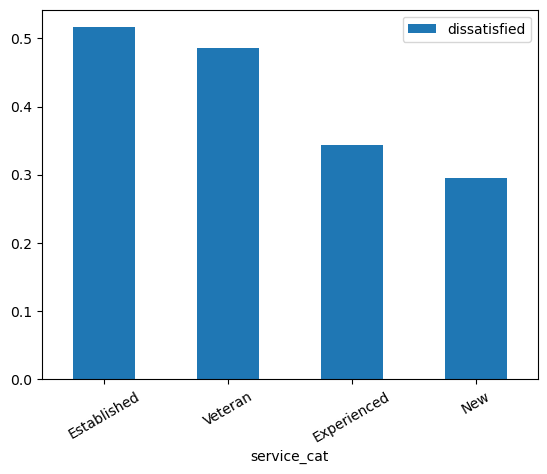

In [96]:
disst_pivot = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
disst_pivot_sorted = disst_pivot.sort_values(by='dissatisfied', ascending=False)
%matplotlib inline
disst_pivot_sorted.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.

In [97]:

import re 
def clean_age(age):
    if pd.isnull(age):
        return np.nan
    # Remove non-numeric characters
    age = re.sub(r'\D', ' ', age)
    # Split by spaces
    ages = age.split()
    # Calculate average for ranges or convert single age string to integer
    if len(ages) > 1:
        return (int(ages[0]) + int(ages[1])) / 2
    else:
        return int(ages[0])

# Apply the cleaning function to the 'Age' column
combined_updated.loc[:,'age'] = combined_updated['age'].apply(clean_age)
combined_updated['age'].value_counts()

C:\Users\wolf0\AppData\Local\Temp\ipykernel_23100\549608067.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated.loc[:,'age'] = combined_updated['age'].apply(clean_age)
C:\Users\wolf0\AppData\Local\Temp\ipykernel_23100\549608067.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined_updated.loc[:,'age'] = combined_updated['age'].apply(clean_age)


43.0    93
48.0    81
38.0    73
53.0    71
28.0    67
23.0    62
33.0    61
56.0    29
58.0    26
61.0    23
20.0    10
Name: age, dtype: int64

<Axes: xlabel='age'>

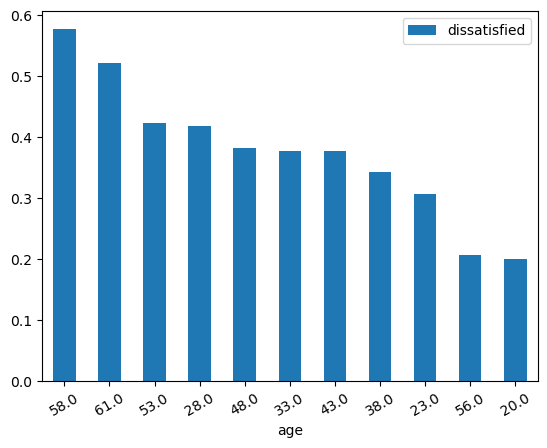

In [98]:
age_pivot = combined_updated.pivot_table(index='age', values='dissatisfied')
age_pivot_sorted = age_pivot.sort_values(by='dissatisfied', ascending=False)
%matplotlib inline
age_pivot_sorted.plot(kind='bar', rot=30)